# Анализ продаж видеоигр

## Описание проекта и данных

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (от 0 до 100)

User_Score — оценка пользователей (от 0 до 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.shape

(16715, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 16715 строк и 11 столбцов. Названия колонок нужно привести к змеиному регистру.

## Предобработка данных

Приведём названия столбцов к змеиному регистру

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Избавимся от пропусков в данных**

В столбце с названиями имеются 2 пропуска, посмортим, что они собой представляют

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Бесполезные строки, спокойно удаляем

In [8]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Также удалим строки, где пропущен год релиза, такие значения составляют очень малую часть данных

In [9]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Далее изменим тип данных в столбцах с годом выпуска и оценкой пользователей

In [10]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце **user_score** обнаружились значения tbd. Интернет говорит, что это аббревиатура To Be Determined (будет определено), то есть данных ещё нет. Заменим на пропуск nan

In [12]:
data['user_score'] = data['user_score'].replace('tbd', 'nan')
data['user_score'] = data['user_score'].astype(float)

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

В стобце rating некоторые значения встречаются очень редко. Википедия гласит: «EC» («Early childhood») — «Для детей младшего возраста». «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Первоначально "K-A" ("Kids to Adults"). «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. **Таким образом, объединяем К-А и ЕС в Е, АО - в М, а RP и пропуски примем за unknown.**

In [15]:
data['rating'] = data['rating'].replace(['EC', 'K-A'], 'E')
data['rating'] = data['rating'].replace('AO', 'M')
data['rating'] = data['rating'].replace('RP', 'unknown') 
data['rating'] = data['rating'].fillna('unknown')
data['rating'].value_counts()

unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

Наибольшее число игр не имеют рейтинг ESRB

Пропуски в столбцах critic_score, user_score и rating оставим без изменений, поскольку их удаление или замена на медиану, среднее и пр. приведут к искажению данных. Появление пропусков может быть связано с некорректной выгрзкой данных, их отсутствием (например, не все игры оценивались критиками).

Добавим столбец с суммарными продажами во всех регионах

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Также проверим таблцу на наличие строк-дубликатов

In [17]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют

## Исследовательский анализ

Определим, сколько игр выпускалось в каждый год.

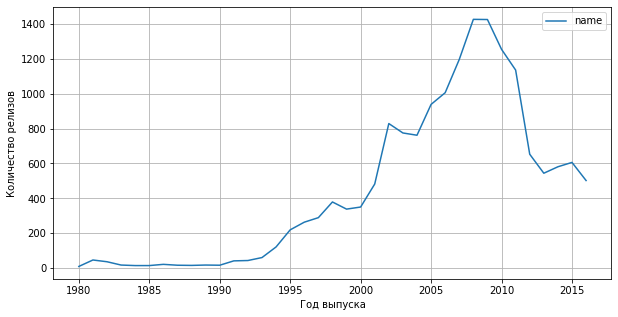

In [18]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, figsize=(10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.show()

Из графика видно, что игровая индустрия пошла в гору в 2000 году.

Далее определим, как менялись продажи по платформам.

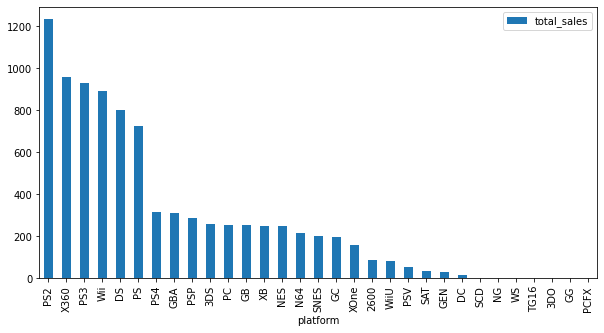

In [19]:
data \
    .pivot_table(index='platform', values='total_sales', aggfunc='sum') \
    .sort_values(by='total_sales', ascending=False) \
    .plot(figsize=(10, 5), kind='bar')
plt.show()

Наибольший объём продаж имеют 6 платформ: PS2, X360, PS3, Wii, DS, PS.

Далее изучим, как менялись продажи этих 6 платформ в разные годы.

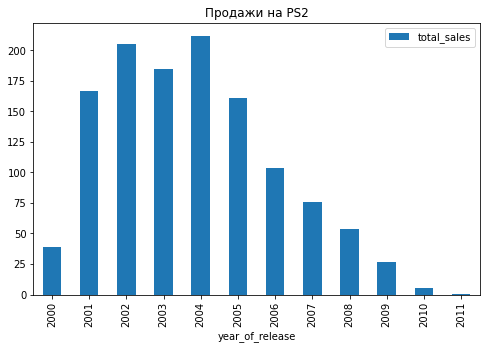

In [20]:
data \
    .query('platform == "PS2"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar') 
plt.title('Продажи на PS2')
plt.show()

Основной объём продаж на PS2 приходился на 2001-2004 годы, после пошёл спад. В 2011 платформа и вовсе потеряла свою актуальность.

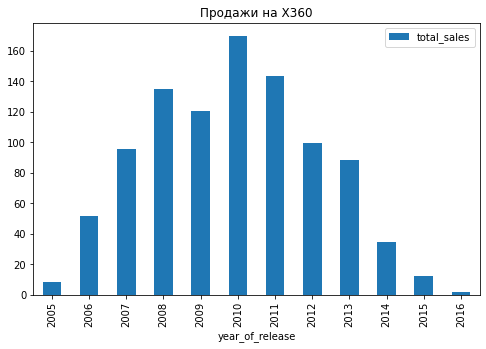

In [21]:
data \
    .query('platform == "X360"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar') 
plt.title('Продажи на X360')
plt.show()

У Х360 продажи находились на высоте в 2008-2011 годах, после началось нижение. После 2016 года платформа уйдёт в небытие.

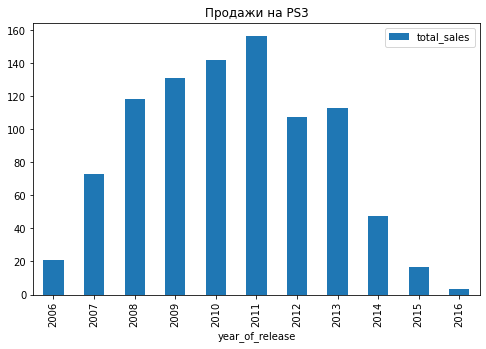

In [22]:
data \
    .query('platform == "PS3"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar')
plt.title('Продажи на PS3')
plt.show()

Аналагично Х360 продажи PS3 имеют самые высокие значения в 2008-2011 годах, после которых идёт спад с небольшим отскоком в 2013. А дальше также в небытие после 2016.

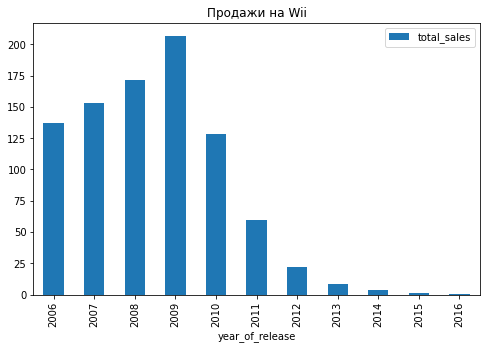

In [23]:
data \
    .query('platform == "Wii"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar')
plt.title('Продажи на Wii')
plt.show()

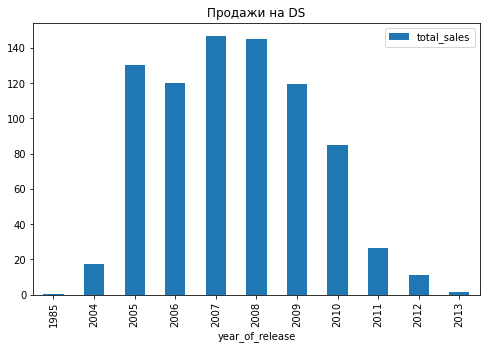

In [24]:
data \
    .query('platform == "DS"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar') 
plt.title('Продажи на DS')
plt.show()

DS держалась молодцом с 2005 по 2008, затем пошла на спад. После 2013 потеряла свою актуальность.

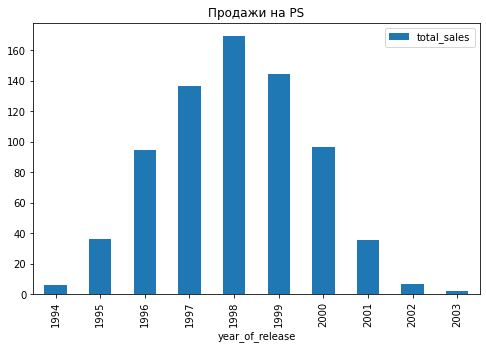

In [25]:
data \
    .query('platform == "PS"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar')
plt.title('Продажи на PS')
plt.show()

Продажи на PS стремительно росли с 1995 по 1998, затем так же стремительно пошли вниз. После 2003 платформа не актуальна.

**Можно сделать вывод о том, что платформы существуют в среднем 10-11 лет и имеют имеют высокий показатель продаж около 4 лет. Поэтому для прогнозирования продаж на 2017 год возьмём данные с 2013 года**

### Какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [26]:
data_actual = data.query('year_of_release >= 2013')

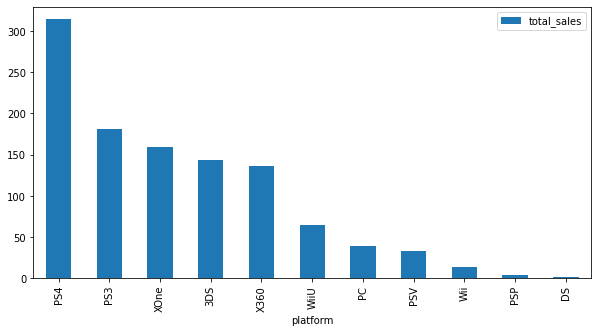

In [27]:
data_actual \
    .pivot_table(index='platform', values='total_sales', aggfunc='sum') \
    .sort_values(by='total_sales', ascending=False) \
    .plot(figsize=(10, 5), kind='bar')
plt.show()

На графике видно, что мы имеем 2 лидера: PS4 и XOne. Стоит изучить их подробнее по годам. Также уделим внимание 3DS, WiiU, PC. Остальные платформы были рассмотрены раннее, роста там не будет.

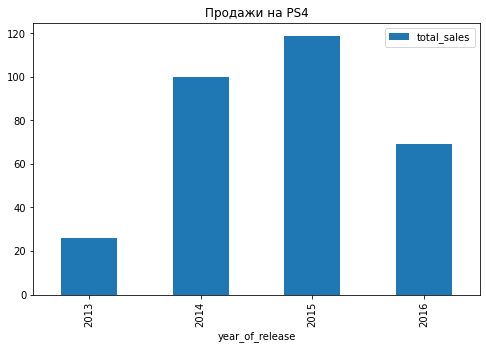

In [28]:
data_actual \
    .query('platform == "PS4"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar') 
plt.title('Продажи на PS4')
plt.show()

Учитывая, что данные за 2016 год неполные, и взяв во внимание, что у предыдущих поколений PS продажи росли на прояжении 4-5 лет, можно предположить, что PS4 в 2017 году принесёт прибыль.

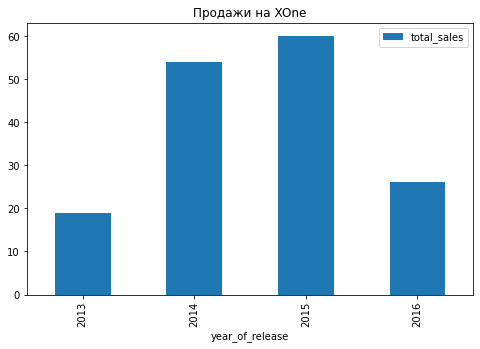

In [29]:
data_actual \
    .query('platform == "XOne"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar') 
plt.title('Продажи на XOne')
plt.show()

Аналогично PS4 можно предположить, что в 2016 и 2017 году продажи будут на высоких уровнях.

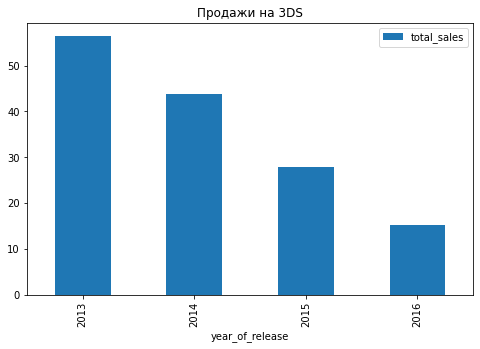

In [30]:
data_actual \
    .query('platform == "3DS"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar') 
plt.title('Продажи на 3DS')
plt.show()

Снижение 3 года подряд, в будущем хороших цифр ждать вряд ли придётся.

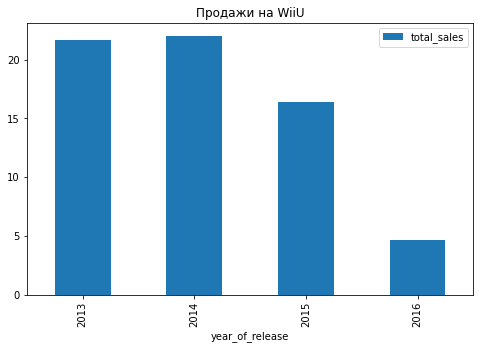

In [31]:
data_actual \
    .query('platform == "WiiU"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar') 
plt.title('Продажи на WiiU')
plt.show()

Данная платформа также находится в фазе снижения.

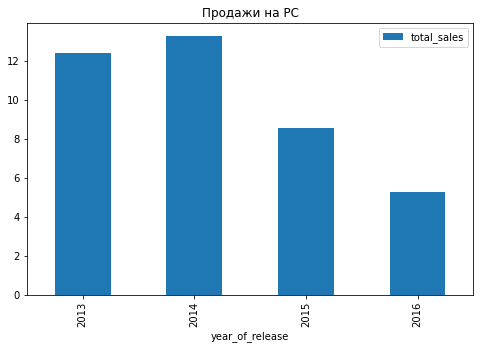

In [32]:
data_actual \
    .query('platform == "PC"') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(figsize=(8, 5), kind='bar') 
plt.title('Продажи на PC')
plt.show()

У PC провальный 2015 год, но может быть в 2016-2017 результаты будут лучше.

**Можно сделать вывод о том, что активно растут 2 платформы: PS4 и XOne; 3DS, WiiU и PC также пока занимают немалую долю рынка и держатся на плаву.**

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

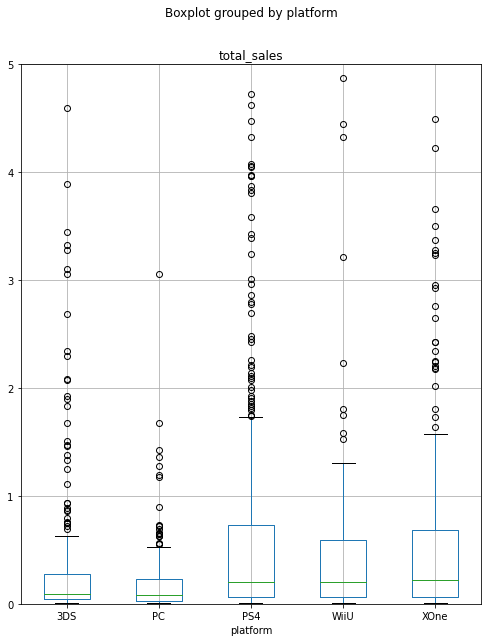

In [33]:
actual_platforms = ['PS4', 'XOne', '3DS', 'WiiU', 'PC']
data_actual.query('platform in @actual_platforms').boxplot(column='total_sales', by='platform', figsize=(8, 10))
plt.ylim(0, 5)
plt.show()

По графику видно, что в лидерах PS4, WiiU и XOne: их медианные значения находятся выше. PC является скорее самым стабильным, размах там меньше всего.

### Влияние оценок пользователей и критиков на продажи внутри платформ

Построим диаграмму рассеяния и посчитаем корреляцию между продажами и отзывами для наших пяти платформ.

Корреляция оценок пользователей с продажами: 0.0419989632391509
Корреляция оценок критиков с продажами: 0.3335753710761152


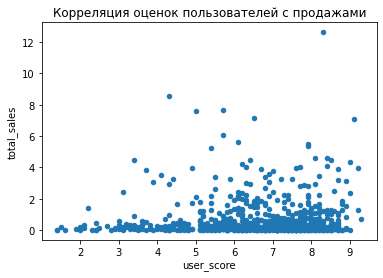

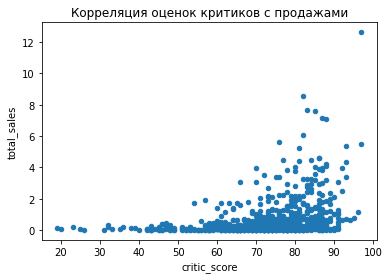

In [34]:
new_data_actual = data_actual.query('platform in @actual_platforms')
new_data_actual.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Корреляция оценок пользователей с продажами')
print('Корреляция оценок пользователей с продажами:',new_data_actual['user_score'].corr(new_data_actual['total_sales']))

new_data_actual.plot(x='critic_score', y='total_sales', kind='scatter') 
plt.title('Корреляция оценок критиков с продажами')
print('Корреляция оценок критиков с продажами:',new_data_actual['critic_score'].corr(new_data_actual['total_sales']))

Также в отдельности разберём одну из платформ, например, XOne.

Корреляция оценок пользователей с продажами: -0.06892505328279414
Корреляция оценок критиков с продажами: 0.4169983280084017


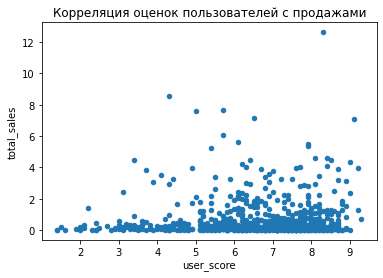

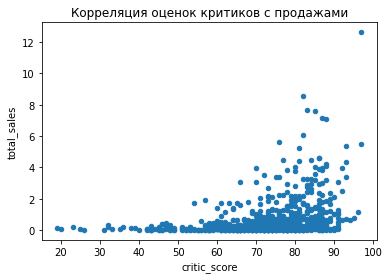

In [35]:
xone_data = new_data_actual.query('platform == "XOne"')
new_data_actual.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Корреляция оценок пользователей с продажами')
print('Корреляция оценок пользователей с продажами:',xone_data['user_score'].corr(xone_data['total_sales']))

new_data_actual.plot(x='critic_score', y='total_sales', kind='scatter') 
plt.title('Корреляция оценок критиков с продажами')
print('Корреляция оценок критиков с продажами:',xone_data['critic_score'].corr(xone_data['total_sales']))

По диаграммам и коэффициенту корреляции Пирсона видно, что оценки критиков слабо влияют на количество продаж наших лидеров рынка и XOne в частности, а оценки пользователей и вовсе на продажи не влияют.

### Общее распределение игр по жанрам

Построим диаграммы размаха для жанров с 2013 по 2016.

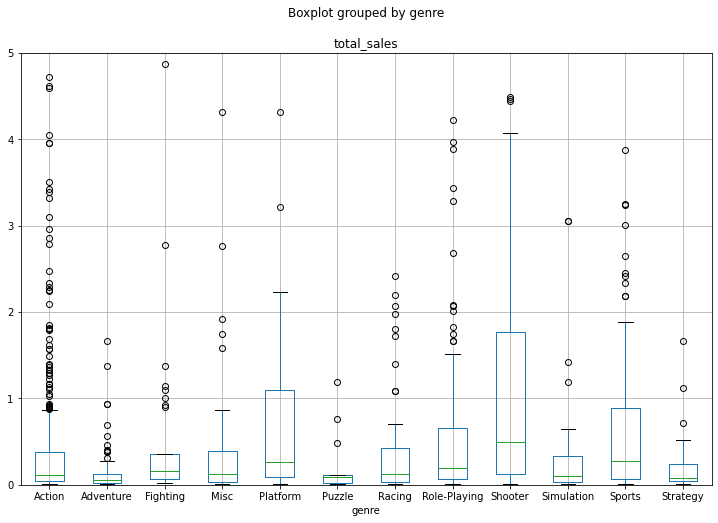

In [36]:
actual_platforms = ['PS4', 'XOne', '3DS', 'WiiU', 'PC']
data_actual.query('platform in @actual_platforms').boxplot(column='total_sales', by='genre', figsize=(12, 8))
plt.ylim(0, 5)
plt.show()

По графику видно, что с 2013 по 2016 г. на наших пяти платформах, исходя из медианного значения продаж, наиболее прибыльные жанры: Shooter, Sports и PLatform.

### Портрет пользователя каждого региона

Определим топ-5 платформ и долю между ними для каждого региона

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64


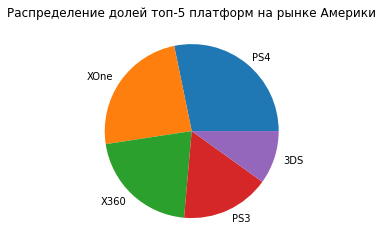

In [37]:
user_platform_na = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
labels_na = ['PS4', 'XOne', 'X360', 'PS3', '3DS']
plt.pie(user_platform_na, labels= labels_na)

print(user_platform_na)
plt.title('Распределение долей топ-5 платформ на рынке Америки')
plt.show()

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64


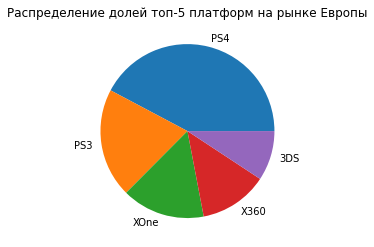

In [38]:
user_platform_eu = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
labels_eu = ['PS4', 'PS3', 'XOne', 'X360', '3DS']
plt.pie(user_platform_eu, labels= labels_eu)

print(user_platform_eu)
plt.title('Распределение долей топ-5 платформ на рынке Европы')
plt.show()

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


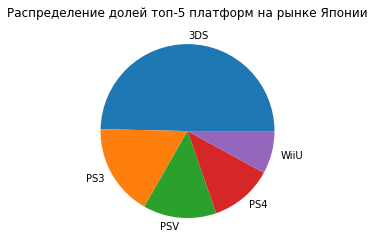

In [39]:
user_platform_jp = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
labels_jp = ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']
plt.pie(user_platform_jp, labels= labels_jp)

print(user_platform_jp)
plt.title('Распределение долей топ-5 платформ на рынке Японии')
plt.show()

Для пользователей Америки и Европы в топ-5 входят одни и те же платформы немного в разных долях, но явно заметно первенство PS4.\
На рынке Японии в топе находятся исключительно платформы родом из самой Японии, львиную долю рынка занимает Nintendo 3DS.

Далее изучим наиболее популярные жанры игр по регионам.

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64


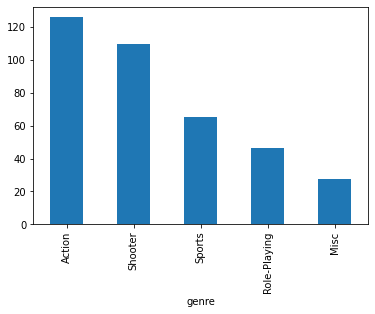

In [40]:
user_genre_na = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
user_genre_na.plot(kind='bar')
print(user_genre_na)
plt.show()

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64


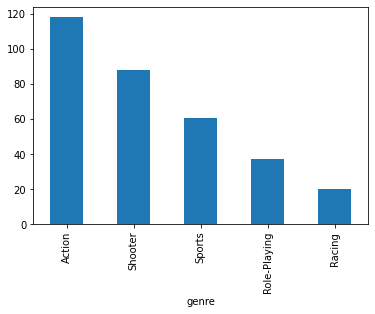

In [41]:
user_genre_eu = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
user_genre_eu.plot(kind='bar')
print(user_genre_eu)
plt.show()

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


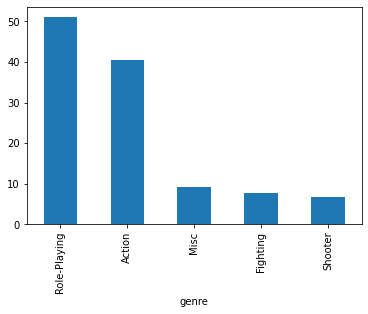

In [42]:
user_genre_jp = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
user_genre_jp.plot(kind='bar')
print(user_genre_jp)
plt.show()

На рынках Америки и Европы одинаково преобладают жанры Action и Shooter. В Японии же на первом месте игры жанра Role-Playing, за ними следуют игры Action. Вероятнее всего причина отличия кроется в культурных особенностях регионов. Но факт, что игры жанра Action имеют популярность и там, и там.

Далее определим влияние рейтинга ESRB на количество продаж в разных регионах.

<AxesSubplot:xlabel='rating'>

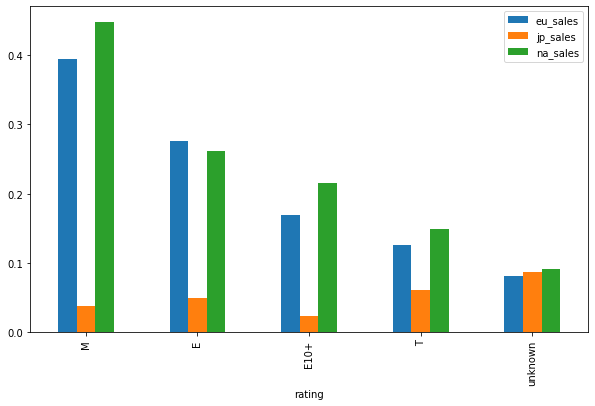

In [43]:
data_actual \
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean') \
    .sort_values(by='na_sales', ascending=False) \
    .plot(kind='bar', figsize=(10, 6)) 

В Европе и Америке наиболее популярные игры категории для взрослых, следом за ними идут игры "для всех". ESRB ориентируется на США и Канаду. Европа также следует трендам стран Северной Америки, поэтому их графики схожи. В Японии же этот рейтинг видимо значения не имеет, поэтому количество продаж игр с рейтингом unknown больше, чем игр с различными оценками ESRB.

## Проверка гипотез

### Гипотеза об идентичности средних пользовательских рейтингов платформ Xbox One и PC.

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые \
H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются друг от друга

In [44]:
results = st.ttest_ind(data_actual.query('platform == "XOne"')['user_score'], data_actual.query('platform == "PC"')['user_score'], nan_policy='omit')
print('p-значение:',results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвернуть нулевую гипотезу')

p-значение: 0.14012658403611503
Не удалось отвернуть нулевую гипотезу


По результатам проверки нельзя отрицать тот факт, что пользовательские оценки XOne и PC имеют схожие значения.

### Гипотеза о различии средних пользовательских рейтингов жанров Action и Sports .

H0:cредние пользовательские рейтинги жанров Action и Sports cхожи \
H1:cредние пользовательские рейтинги жанров Action и Sports разные

In [45]:
results = st.ttest_ind(data_actual.query('genre == "Action"')['user_score'], data_actual.query('genre == "Sports"')['user_score'], nan_policy='omit')
print('p-значение:',results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвернуть нулевую гипотезу')

p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


Результат проверки гипотезы говорит, что пользовательские рейтинги жанров Action и Sports отличаются.

## Общий вывод

В процессе исследования была проведена предобработка данных, включающая в себя: изменение названий столбцов, изменение типов данных и работу с пропусками.

Также был проведён исследовательский анализ данных, в результате которого было сделано несколько выводов:
1) Наибольший объём продаж за всё время имеют 6 платформ: PS2, X360, PS3, Wii, DS, PS.\
2) Были определены наиболее успешные платформы в акутальный период времени: PS4, XOne, 3DS, WiiU и PC.\
3) Установлено, что оценки пользователей и критиков слабо влияют на объём продаж.\
4) С 2013 по 2016 г. на платформах-лидерах наиболее популярные жанры: Shooter, Sports и PLatform.\
5) Составлены портреты пользователей из разных регионов, в результате сравнения которых было обнаружено сходство в предпочтениях Европы и Северной Америки и отличие от них рынка Японии. Но был выявлен факт того, что игры жанра Action пользуются огромной популярностью в представленных регионах.

В результате проверки двух гипотез было установлено, что пользовательские оценки XOne и PC скорее имеют схожие значения и что пользовательские рейтинги жанров Action и Sports отличаются.


Заказчику следует обратить внимание на следующие моменты:
1) Предпочтения пользователей Северной Америки и Европы во многом схожи: самыми популярными платформами являются PS4 и XOne, а любимыми (и прибыльными) жанрами - Action, Shooter и Sports. Это болшой и привлекательный рынок.\
2) Рынок же Японии сильно отличается от двух предыдущих: самой популярной платформой является 3DS, а любимыми жанрами - Role-Playing и Action.